<a href="https://colab.research.google.com/github/Betinsss/CSST102-3A/blob/main/3A-LAT-MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering on a Customer Segmentation Dataset**

**1. Data Exploration and Preprocessing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  29.750000   36500.00000      41.500000
50%      10.50000  35.500000   42500.00000      57.500000
75%      15.25000  40.250000   52750.00000      77.000000
max      20.00000  55.000000  100000.00000      92.000000
CustomerID       0
Age              0
AnnualIncome     0
SpendingScore    0


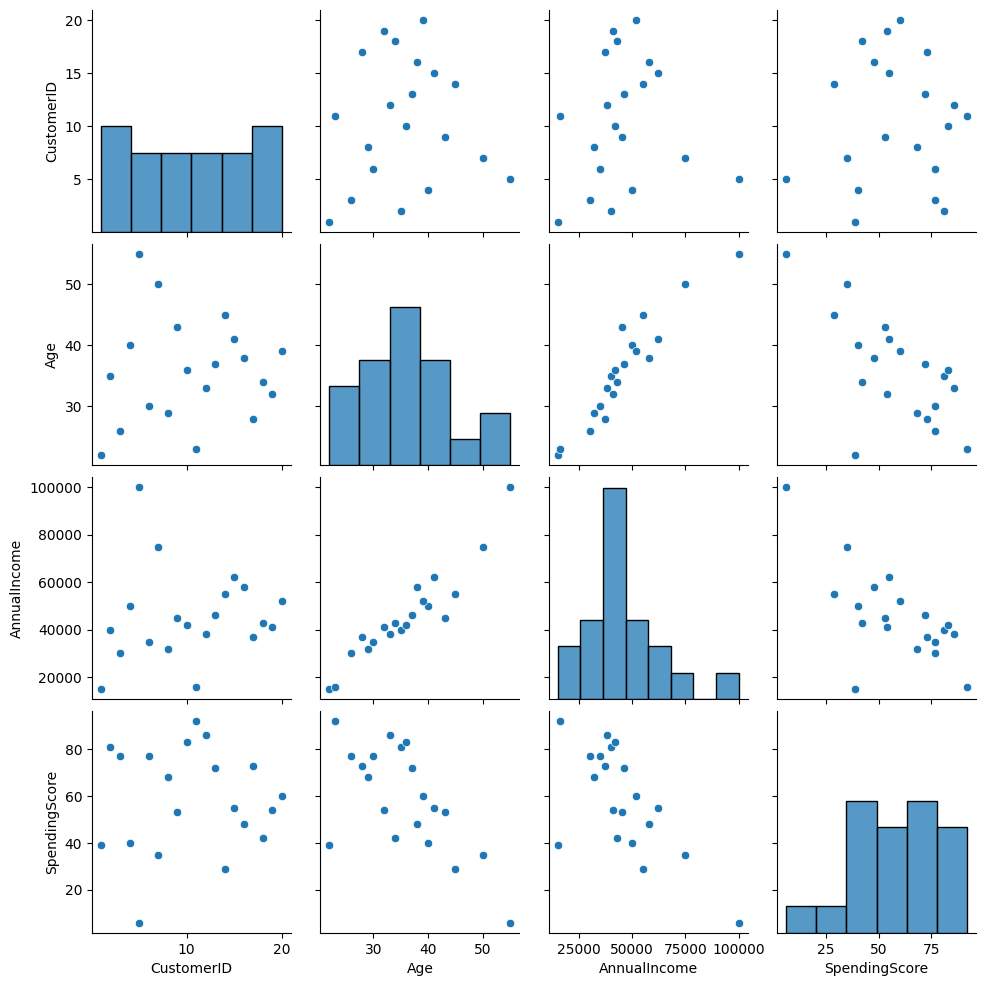

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('customer_segmentation.csv')

# Inspect the dataset
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (e.g., filling with mean)
data.fillna(data.mean(), inplace=True)

# Visualize feature relationships using pair plot
sns.pairplot(data)
plt.show()

# Scale the data (K-Means is sensitive to scale)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a scaled dataframe for easier visualization
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


**2. Model Development**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


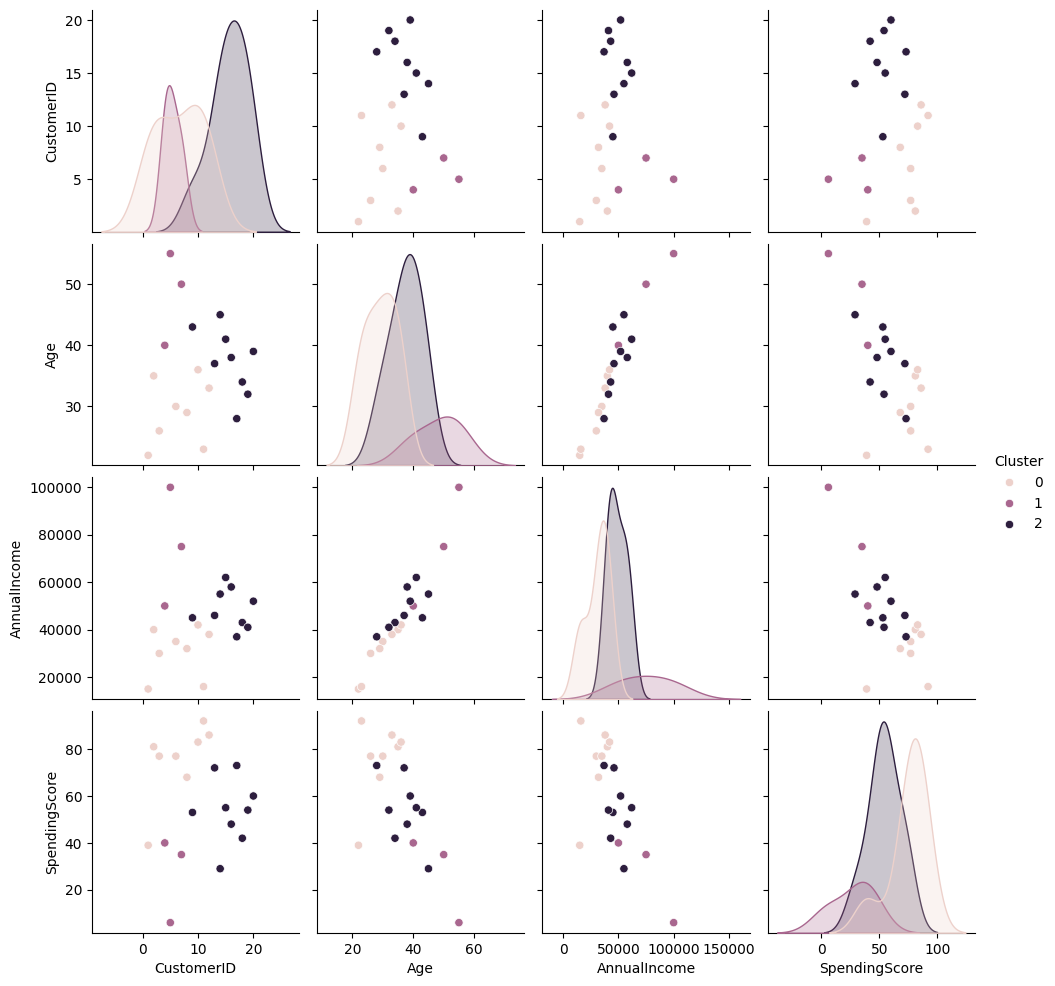

In [ ]:
from sklearn.cluster import KMeans

# Initialize K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize clusters with pairplot
sns.pairplot(data, hue='Cluster')
plt.show()


**3. Model Evaluation**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

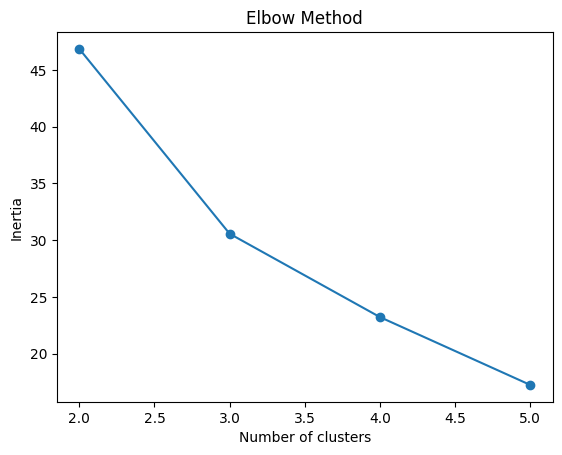

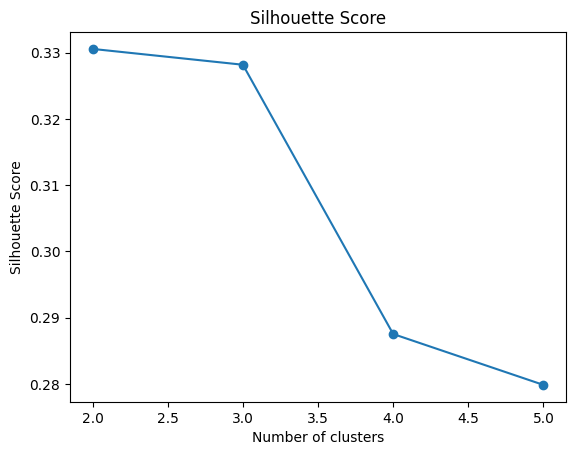

In [ ]:
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

# Try different k values to find the optimal number of clusters
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow Method for inertia
plt.plot(range(2, 6), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Plot Silhouette Score
plt.plot(range(2, 6), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


**4. Report and Visualizations:**

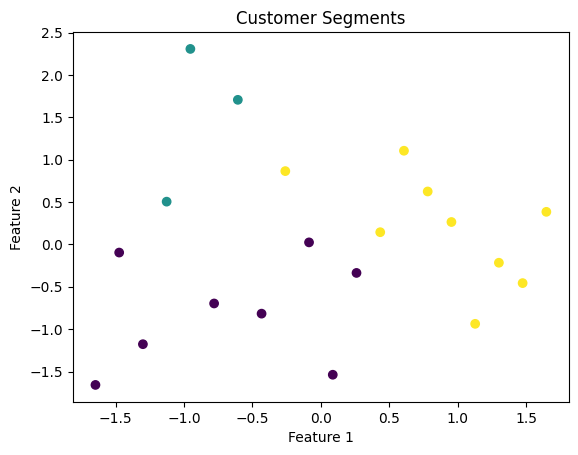

Cluster 0:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    8.000000   8.000000       8.00000       8.000000      8.0
mean     6.625000  29.250000   31000.00000      75.375000      0.0
std      4.274091   5.284749   10350.98339      16.308959      0.0
min      1.000000  22.000000   15000.00000      39.000000      0.0
25%      2.750000  25.250000   26500.00000      74.750000      0.0
50%      7.000000  29.500000   33500.00000      79.000000      0.0
75%     10.250000  33.500000   38500.00000      83.750000      0.0
max     12.000000  36.000000   42000.00000      92.000000      0.0
Cluster 1:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    3.000000   3.000000           3.0        3.00000      3.0
mean     5.333333  48.333333       75000.0       27.00000      1.0
std      1.527525   7.637626       25000.0       18.35756      0.0
min      4.000000  40.000000       50000.0        6.00000      1.0
25%      4.500000  45.000000       62500

In [ ]:
# Visualize clusters in a 2D plot (using the first two features as an example)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Interpretation of clusters
for i in range(kmeans.n_clusters):
    cluster_data = data[data['Cluster'] == i]
    print(f"Cluster {i}:")
    print(cluster_data.describe())


### Step-by-Step Implementation

#### 1. **Data Exploration and Preprocessing**

- First, we load the dataset and check for missing values and feature distributions. Missing values can be filled or dropped depending on the scenario.
- Since K-Means is sensitive to feature scales, it's crucial to normalize the data. Here, `StandardScaler` is used to standardize the data (mean=0, std=1).

#### 2. **Model Development: K-Means Clustering**

- Initially, we start with `k=3` to form 3 clusters. The K-Means algorithm assigns each data point to one of the clusters, and the resulting clusters are visualized.
  
#### 3. **Model Evaluation: Elbow Method and Silhouette Score**

- **Elbow Method**: Plots the inertia (sum of squared distances to centroids) against the number of clusters. The point where the decrease in inertia slows down ("elbow") gives the optimal k.
- **Silhouette Score**: Measures how well the data points are clustered. Higher silhouette scores indicate better-defined clusters.

#### 4. **Visualization and Interpretation of Results**

- After identifying the optimal k, we can plot the clusters. In the 2D scatter plot, each cluster is represented by a different color.
- Interpretation is based on the summary statistics for each cluster. For example, one cluster may represent high-income, high-spending customers, while another might represent younger, low-spending customers.

### Key Points:

1. **Data Preprocessing**: It's important to clean the data by handling missing values and normalizing features since K-Means clustering is affected by feature scales.
2. **Choosing k**: The Elbow Method helps visualize the inertia, and the Silhouette Score provides insight into how well-separated the clusters are.
3. **Cluster Interpretation**: After clustering, interpreting the results involves looking at key statistics for each cluster to describe customer segments. Each segment may reflect distinct demographic or behavioral characteristics, such as spending habits or age groups.

